# Introduction

**Description du Projet** : Repondre à un appel à projets pour trouver des idées innovantes d'applications en lien avec l'alimentation. <br>
Le présent notebook comporte les nettoyages des données structurées.

# Importer Libraries et Données

In [1]:
### import libraries
import dask.dataframe as dd
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd

pd.options.mode.chained_assignment = None

In [2]:
%%time
# specify dtypes of certains columns
dtypes = {
    "brand_owner": object,
    "generic_name": object,
    "ingredients_from_palm_oil_tags": object,
    "ingredients_that_may_be_from_palm_oil_tags": object,
    "origins": object,
    "origins_en": object,
    "origins_tags": object,
    "packaging_text": object,
    "traces": object,
    "traces_en": object,
    "traces_tags": object,
    "code": object,
    "abbreviated_product_name": object,
    "additives": object,
}

# import data
df_raw = dd.read_csv(
    "data/products.csv", sep="\t", dtype=dtypes, low_memory=False
).compute() # compute() is to transform dask df into pandas df

CPU times: user 4min 3s, sys: 1min 30s, total: 5min 33s
Wall time: 3min 22s


In [3]:
df_raw.shape

(1806889, 186)

In [4]:
df_raw.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
%%time
df_raw.describe()

CPU times: user 1min 3s, sys: 24.3 s, total: 1min 27s
Wall time: 1min 27s


,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.806889e+06,1.806889e+06,0.0,0.0,4.707020e+05,0.0,694762.000000,694762.000000,0.0,694762.000000,...,11704.000000,670627.000000,9.000000,4.000000,1.0,60.000000,1712.000000,32.000000,63.000000,38.000000
mean,1.553217e+09,1.588358e+09,NaN,NaN,2.360549e+16,NaN,2.041917,0.020634,NaN,0.069263,...,619.415522,9.165636,12.777778,34.175000,9.1,1.130820,0.068921,3.583438,0.028982,0.026153
std,5.071985e+07,2.911733e+07,NaN,NaN,1.619513e+19,NaN,2.914161,0.144068,NaN,0.301277,...,6124.151032,8.871805,10.580380,15.620153,NaN,8.005521,1.826776,1.461794,0.026032,0.091160
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000,...,0.049000,-15.000000,-3.000000,14.000000,9.1,0.000000,0.000000,0.400000,0.001350,0.000800
25%,1.520446e+09,1.578989e+09,NaN,NaN,2.800000e+01,NaN,0.000000,0.000000,NaN,0.000000,...,110.260000,2.000000,3.000000,26.000000,9.1,0.058250,0.000008,2.775000,0.010000,0.007025
50%,1.564589e+09,1.587827e+09,NaN,NaN,5.000000e+01,NaN,1.000000,0.000000,NaN,0.000000,...,329.360000,10.000000,13.000000,37.000000,9.1,0.071800,0.000023,3.950000,0.025000,0.011000
75%,1.588334e+09,1.611781e+09,NaN,NaN,1.130000e+02,NaN,3.000000,0.000000,NaN,0.000000,...,614.200000,16.000000,22.000000,45.175000,9.1,0.117750,0.000096,4.000000,0.038000,0.015000
max,1.622163e+09,1.622163e+09,NaN,NaN,1.111111e+22,NaN,49.000000,3.000000,NaN,6.000000,...,656298.600000,40.000000,25.000000,48.700000,9.1,62.100000,54.000000,7.300000,0.150000,0.572000


# Nettoyage de Données

## Vérifier Données Manquantes

### Général

In [6]:
# number of null values in each column
null_columns=df_raw.columns[df_raw.isnull().any()]
df_raw[null_columns].isnull().sum().sort_values(ascending=False)

ingredients_from_palm_oil                1806889
no_nutriments                            1806889
ingredients_that_may_be_from_palm_oil    1806889
cities                                   1806889
allergens_en                             1806889
                                          ...   
countries_tags                              5572
countries_en                                5572
countries                                   5567
pnns_groups_2                                432
creator                                        4
Length: 177, dtype: int64

In [7]:
# number of columns that contains null values
len(null_columns)

177

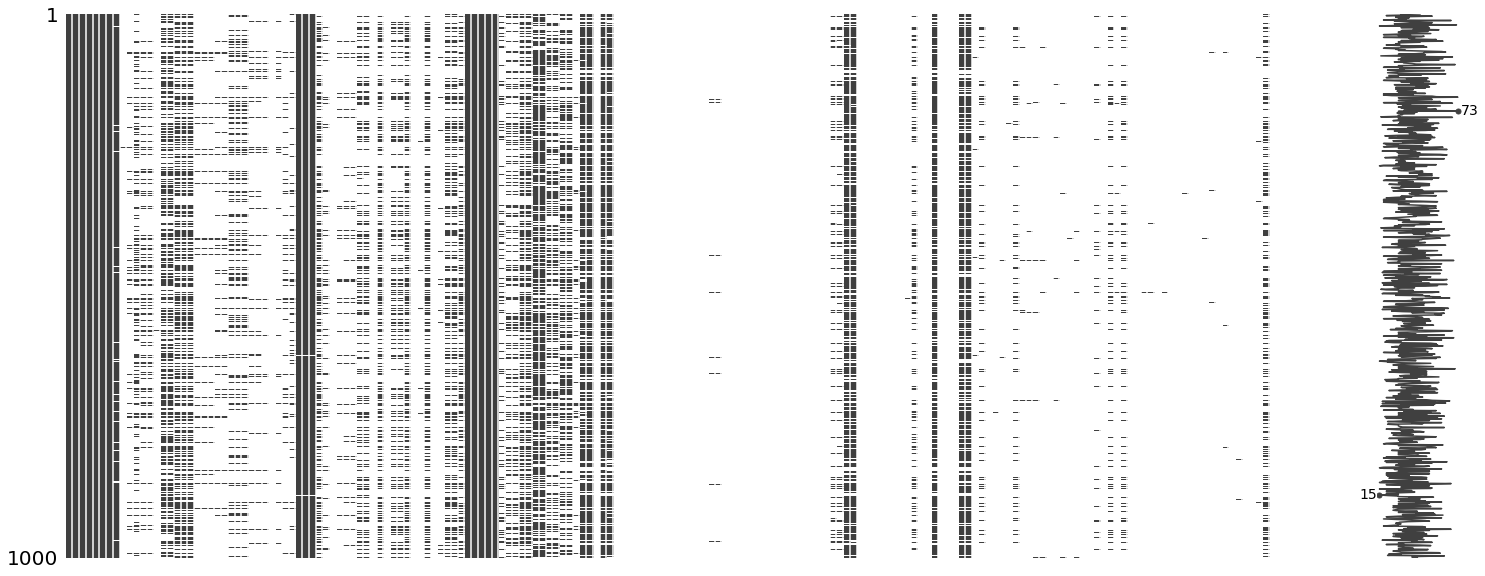

In [8]:
# visualize missing values pattern across columns in the form of matrix
msno.matrix(df_raw.sample(1000))
plt.show()

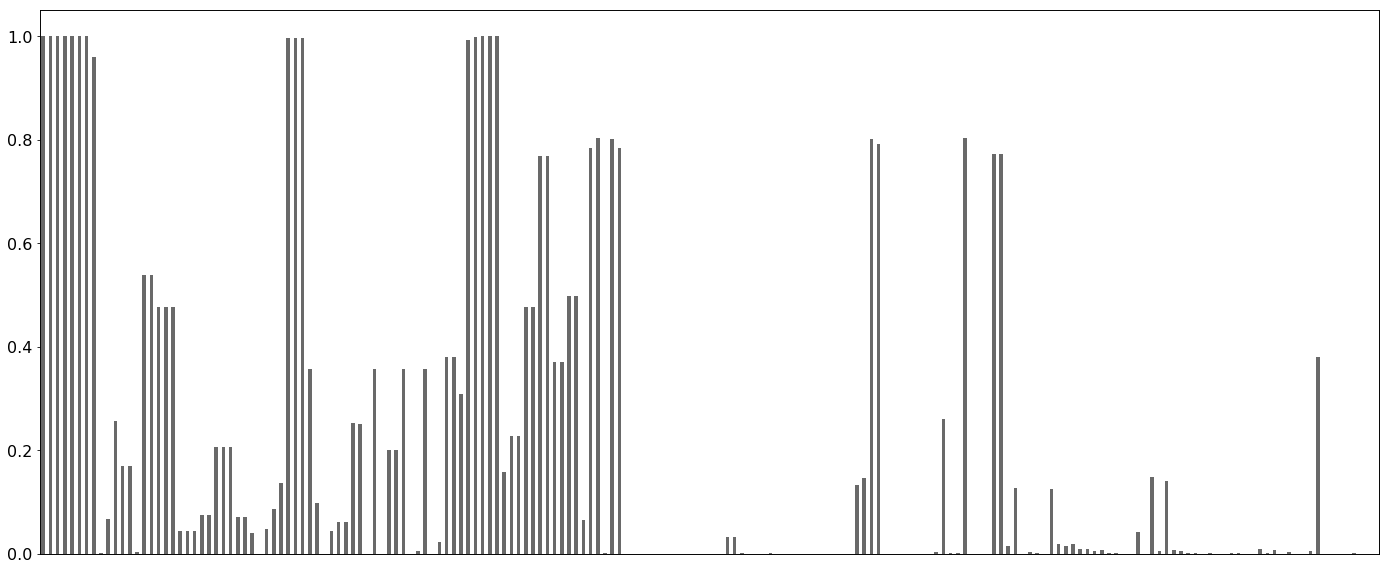

In [9]:
# visualize number of null values by column
try:
    msno.bar(df_raw.sample(1000))
except ValueError:
    pass

In [10]:
# calculate the number of columns that are filled less than 60%
num_cols_60pct = (df_raw.isnull().mean() > (1-0.6)).sum()
print(f"Number of columns that are filled less than 60%: {num_cols_60pct}")

Number of columns that are filled less than 60%: 159


**Remarque**<br>
Il y a beaucoup de colonnes (177 sur 186) qui ont des valeurs manquantes dont presque la moitié sont complètement vide ou peu remplies.

Selon la diagramme à bandes ci-dessus, ce n'est pas intéressant à garder les colonnes qui sont remplies à moins de 60%. Il y a 85.5% (159 sur 186) colonnes sont remplies à moins de 60%.

### Colonnes Spécifiques

In [11]:
# List all the columns in the raw dataframe
df_raw.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_t

In [12]:
# Create a list of intersting columns
nutri_list = [
    "nutriscore_score",
    "nutriscore_grade",
    "nutrition-score-fr_100g",
    "nutrition-score-uk_100g",
    "image_ingredients_url",
    "image_nutrition_small_url",
    "packaging",
    "packaging_tags",
    "packaging_text",
]

# check filled-rate of these interesting columns
for nutriscore in nutri_list:
    filled_rate = 100 - df_raw[nutriscore].isnull().sum() / len(df_raw) * 100
    print(f"{nutriscore:>25}: {filled_rate:>7.4f}%")

         nutriscore_score: 37.1147%
         nutriscore_grade: 37.1147%
  nutrition-score-fr_100g: 37.1150%
  nutrition-score-uk_100g:  0.0005%
    image_ingredients_url: 37.6911%
image_nutrition_small_url: 49.4395%
                packaging: 15.9625%
           packaging_tags: 15.9609%
           packaging_text:  0.2477%


In [13]:
# calculate the number of columns that are filled less than 37%
num_cols_37pct = (df_raw.isnull().mean() > (1-0.37)).sum()
print(f"Number of columns that are filled less than 37%: {num_cols_37pct}")

Number of columns that are filled less than 37%: 141


**Remarque**<br>
Les colonnes "nutriscore_score" et "nutriscore_grade", qui ont le taux de remplissage de 37%, sont intéressant à garder. C'est la raison pour laquelle que les colonnes qui ont le taux de replissage moins de 37% seront été filtrées.

Il y a 75.5% (141 sur 186) colonnes sont remplies à moins de 37%.

## Fonctions d'Outils

In [14]:
def clean_columns(df: pd.DataFrame, filled_rate: float = 0.6) -> pd.DataFrame:
    """
    Data cleansing for null columns

    Parameters
    ----------
    df : dataframe
        The dataframe to be cleaned

    filled_rate : float, default 0.6
        The filled rate to be kept for all columns

    Returns
    -------
    dataframe
        A cleaned dataframe with columns that are filled more than the 'filled_rate'
    """

    print(f"Initial shape of the dataframe: {str(df.shape) : >17}")
    # keep columns that are filled more than the filled rate, default = 60%
    df = df.loc[:, (df.isnull().mean() < (1 - filled_rate))]
    print(f"Shape after removing null columns: {df.shape}")

    return df


def clean_rows(df: pd.DataFrame, slice1: int, slice2: int) -> pd.DataFrame:
    """
    Data cleansing for null rows between columns that
    are indicated by slice1 and slice2

    Parameters
    ----------
    df : dataframe
        The dataframe to be cleaned
    slice1, slice2: int
        The start and end slice respectively 
        indicating the columns to be filtered

    Returns
    -------
    dataframe
        A cleaned dataframe without rows that have null values
        between columns that are indicated by slice1 and slice2
    """

    # create mask to filter df with rows that have ONLY null values
    # with columns indicated in slice1 and slice2
    mask = [any(df.iloc[row, slice1:slice2].notna()) for row in range(len(df))]
    # filter df
    df = df.iloc[mask]
    df.reset_index(drop=True, inplace=True)
    print(
        f"Shape after removing null rows between {df.columns[slice1]} and \n{df.columns[slice2]}:\n"
    )
    print(df.shape, "\n")

    return df


def drop_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    """
    Data cleansing for duplicated rows

    Parameters
    ----------
    df : dataframe
        The dataframe to be cleaned

    Returns
    -------
    dataframe
        A cleaned dataframe without duplicated rows
    """

    # drop duplicates if there is any
    if df.code.duplicated().any():
        df.drop_duplicates(subset=["code"], keep="last", inplace=True)
        print(f"Shape after dropping duplicated rows:\n{df.shape}\n")
    else:
        print("There isn't duplicated data.")

    return df

## Par Colonnes

In [15]:
%%time
df_cleaned_cols = clean_columns(df_raw, filled_rate=0.37)

Initial shape of the dataframe:    (1806889, 186)
Shape after removing null columns: (1806889, 45)
CPU times: user 7.68 s, sys: 24.4 ms, total: 7.7 s
Wall time: 7.61 s


In [16]:
# Calculate by how much the df is reduced in terms of columns
print(f"{(1 - df_cleaned_cols.shape[1]/df_raw.shape[1])*100 :0.2f}%")

75.81%


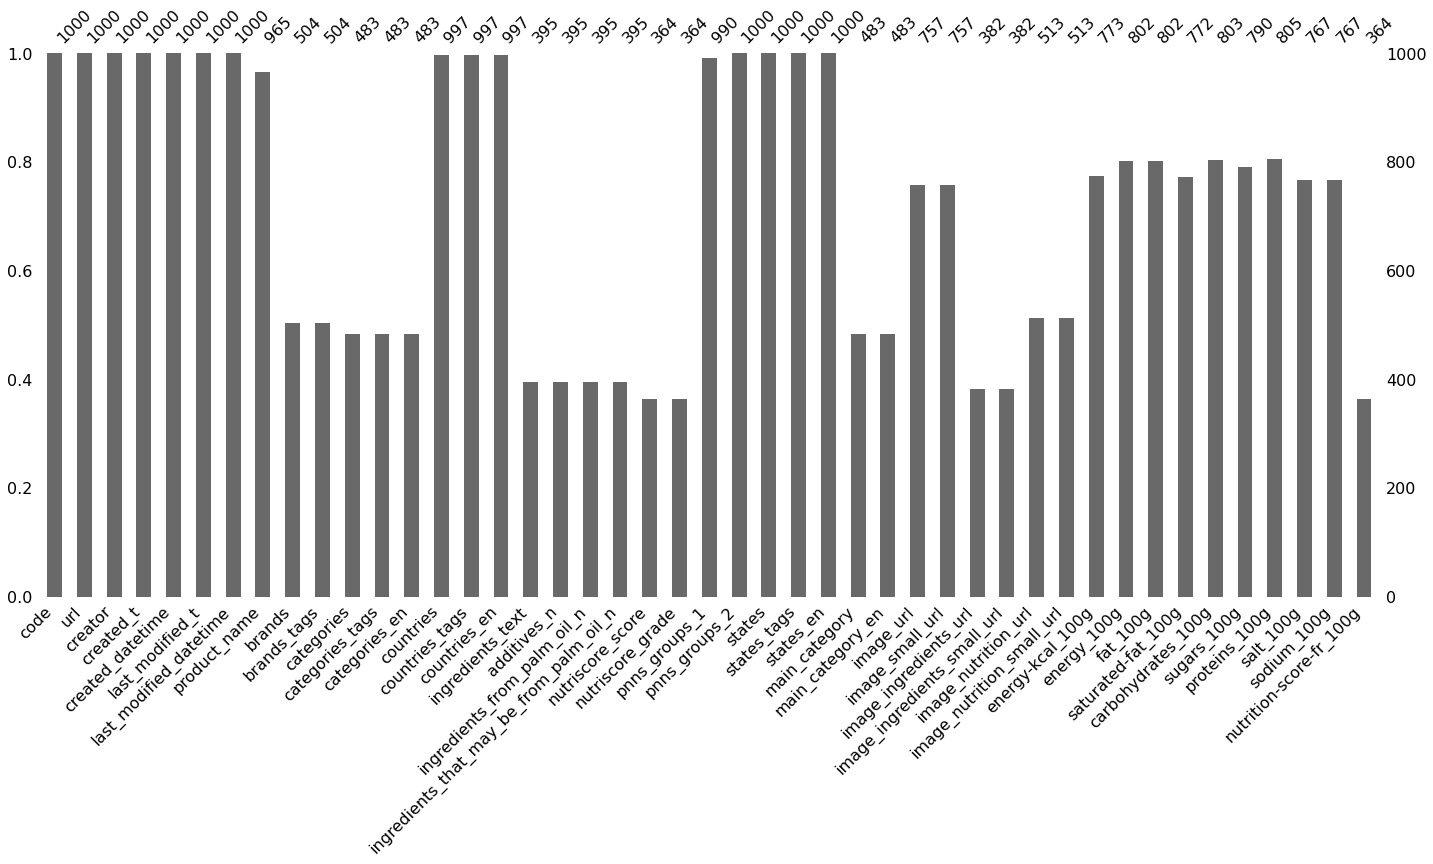

In [17]:
# visualize number of null values by column
# msno.bar(df)
msno.bar(df_cleaned_cols.sample(1000))
plt.show()

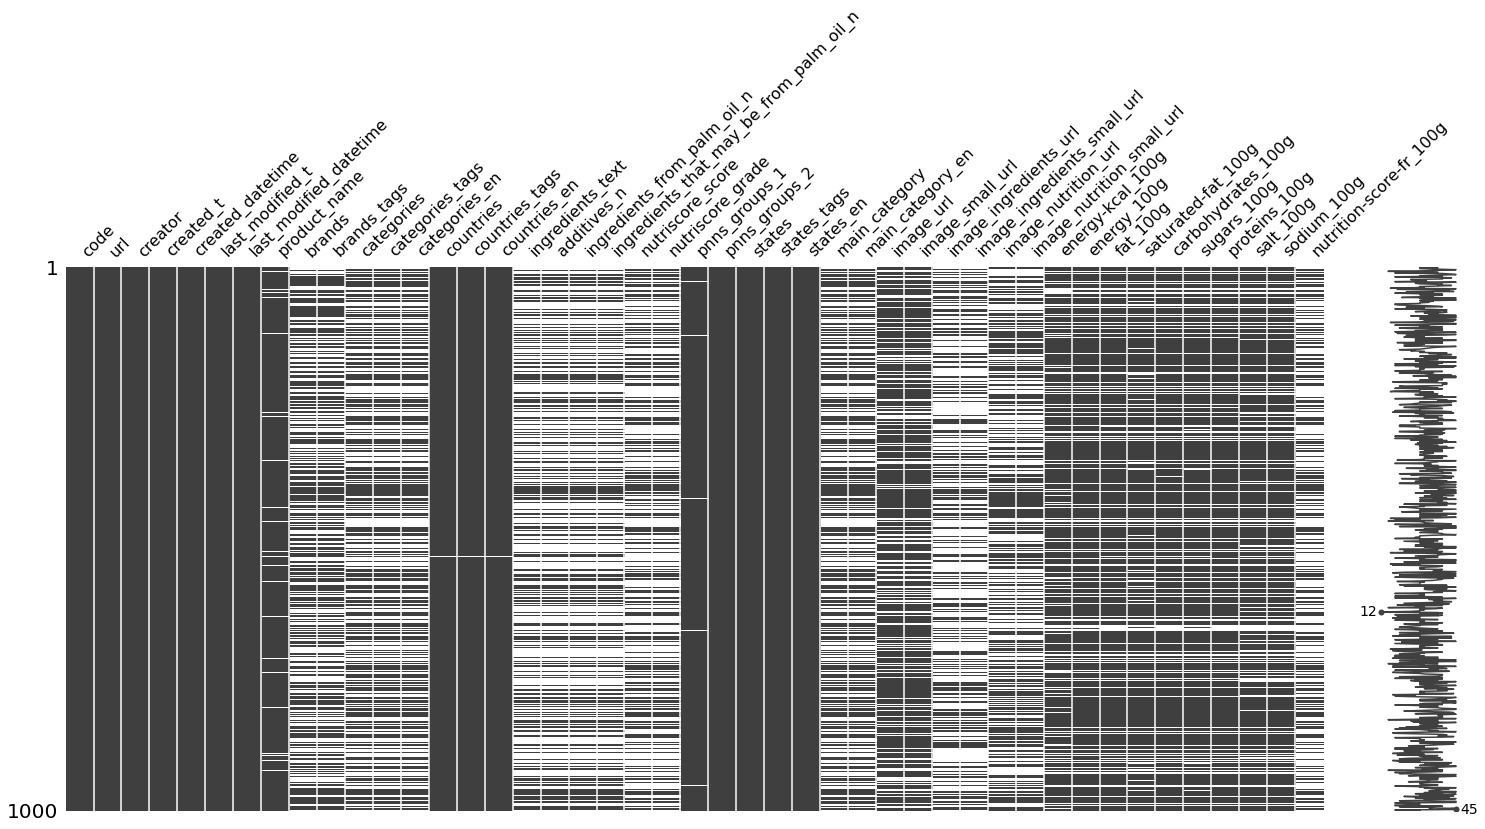

In [18]:
# visualize missing values pattern across columns in the form of matrix
msno.matrix(df_cleaned_cols.sample(1000))
plt.show()

**Remarque**<br>
Il y a déjà beaucoup moins de données manquantes. 

In [19]:
# check all the columns
df_cleaned_cols.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutriscore_score',
 'nutriscore_grade',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'main_category_en',
 'image_url',
 'image_small_url',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'image_nutrition_url',
 'image_nutrition_small_url',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

In [20]:
pd.set_option("display.max_columns", 45)
df_cleaned_cols.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,7.8,1.4,0.56,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,874.9,3661.0,15.1,6.10,2.6,1.0,15.7,2.1,0.84,NaN
4,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",France,en:france,France,eau graines de téguments de moutarde vinaigre ...,0.0,0.0,0.0,18.0,d,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:mustards,Mustards,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.20,29.0,22

In [21]:
# reset the number of maximum columns to be displayed
pd.reset_option("display.max_columns")

In [22]:
# check the values of the variety of columns for 'brands'
print("Columne: brands")
print("===============")
print(df_cleaned_cols.brands.unique()[:10], '\n')
print("Columne: brands_tags")
print("====================")
print(df_cleaned_cols.brands_tags.unique()[:10])

Columne: brands
[nan 'courte paille' 'Watt' 'Jeff de Bruges' 'CROUS' "Crous Resto',Crous"
 'Ferme De La Frémondière' 'Crous' 'Crous resto' "Ferme t'y R'nao"] 

Columne: brands_tags
[nan 'courte-paille' 'watt' 'jeff-de-bruges' 'crous' 'crous-resto,crous'
 'ferme-de-la-fremondiere' 'crous-resto' 'ferme-t-y-r-nao' 'torn-glasser']


**Remarque**<br>
Colonne à dropper : *brands_tags*

In [23]:
# check the values of the variety of columns for 'categories'
print("Columne: categories")
print("===================")
print(df_cleaned_cols.categories.unique()[:5], '\n')
print("Columne: categories_tags")
print("========================")
print(df_cleaned_cols.categories_tags.unique()[:5], '\n')
print("Columne: categories_en")
print("======================")
print(df_cleaned_cols.categories_en.unique()[:5])

Columne: categories
[nan 'Epicerie, Condiments, Sauces, Moutardes' 'Xsf' "Pâte d'amende"
 'Plats préparés, Légumes préparés, Carottes râpées, Carottes râpées assaisonnées'] 

Columne: categories_tags
[nan 'en:groceries,en:condiments,en:sauces,en:mustards' 'fr:xsf'
 'fr:pate-d-amende'
 'en:meals,en:prepared-vegetables,en:grated-carrots,en:seasoned-shredded-carrots'] 

Columne: categories_en
[nan 'Groceries,Condiments,Sauces,Mustards' 'fr:xsf' 'fr:pate-d-amende'
 'Meals,Prepared vegetables,Grated carrots,Seasoned shredded carrots']


**Remarque**<br>
Colonne à dropper : *categories_tags* et *categories_en*

In [24]:
# check the values of the variety of columns for 'categories'
print("Columne: countries")
print("===================")
print(df_cleaned_cols.countries.unique()[:5], '\n')
print("Columne: countries_tags")
print("========================")
print(df_cleaned_cols.countries_tags.unique()[:5], '\n')
print("Columne: countries_en")
print("======================")
print(df_cleaned_cols.countries_en.unique()[:5])

Columne: countries
['France' 'en:es' 'en:France' 'en:france' 'en:fr'] 

Columne: countries_tags
['en:france' 'en:spain' 'en:united-states' 'en:ireland' nan] 

Columne: countries_en
['France' 'Spain' 'United States' 'Ireland' nan]


**Remarque**<br>
Colonne à dropper : *countries* et *countries_en*

In [25]:
# check the values of the variety of columns for 'main_category'
print("Columne: main_category")
print("===================")
print(df_cleaned_cols.main_category.unique()[:10], '\n')
print("Columne: main_category_en")
print("===================")
print(df_cleaned_cols.main_category_en.unique()[:10])

Columne: main_category
[nan 'en:mustards' 'fr:xsf' 'fr:pate-d-amende'
 'en:seasoned-shredded-carrots' 'en:coconut-pies' 'en:pear-compotes'
 'fr:aiguillettes-de-poulet' 'en:vegetables-macedoines'
 'en:juices-and-nectars'] 

Columne: main_category_en
[nan 'Mustards' 'fr:xsf' 'fr:pate-d-amende' 'Seasoned shredded carrots'
 'Coconut pies' 'Pear compotes' 'fr:Aiguillettes de poulet'
 'Vegetables macedoines' 'Juices and nectars']


In [26]:
print(df_cleaned_cols.main_category.isnull().sum())
print(df_cleaned_cols.main_category_en.isnull().sum())

943634
943634


**Remarque**<br>
Colonne à dropper : *main_category*

**Remarque pour Toutes les Colonnes**<br>
Toutes les colonnes à dropper (inutile à garder):<br>
url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, brands_tags, categories_tags, categories_en, countries, countries_tags, states, states_tags, states_en, main_category, image_small_url, image_ingredients_url, image_ingredients_small_url, image_nutrition_url, image_nutrition_small_url

In [27]:
# create a list of columns to be dropped
col_to_be_dropped = ['url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'brands_tags',
 'categories_tags',
 'categories_en',
 'countries',
 'countries_tags',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'image_small_url',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'image_nutrition_url',
 'image_nutrition_small_url']

# drop all the columns in the col_to_be_dropped list
df_cleaned_cols.drop(columns=col_to_be_dropped, inplace=True)

In [28]:
df_cleaned_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806889 entries, 0 to 11682
Data columns (total 25 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   code                                     object 
 1   product_name                             object 
 2   brands                                   object 
 3   categories                               object 
 4   countries_en                             object 
 5   ingredients_text                         object 
 6   additives_n                              float64
 7   ingredients_from_palm_oil_n              float64
 8   ingredients_that_may_be_from_palm_oil_n  float64
 9   nutriscore_score                         float64
 10  nutriscore_grade                         object 
 11  pnns_groups_1                            object 
 12  pnns_groups_2                            object 
 13  main_category_en                         object 
 14  image_url           

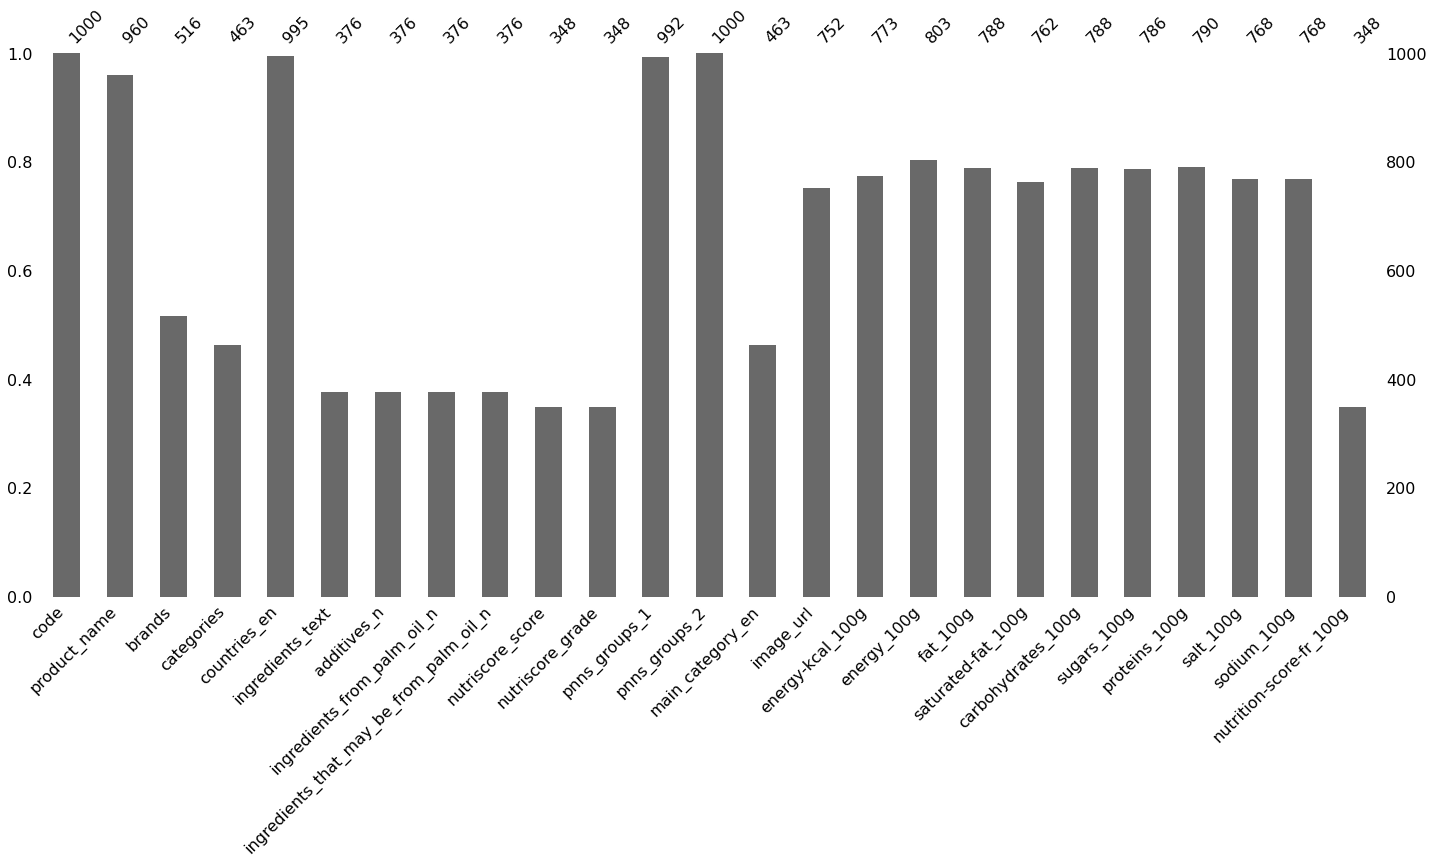

In [29]:
# visualize number of null values by column
msno.bar(df_cleaned_cols.sample(1000))
plt.show()

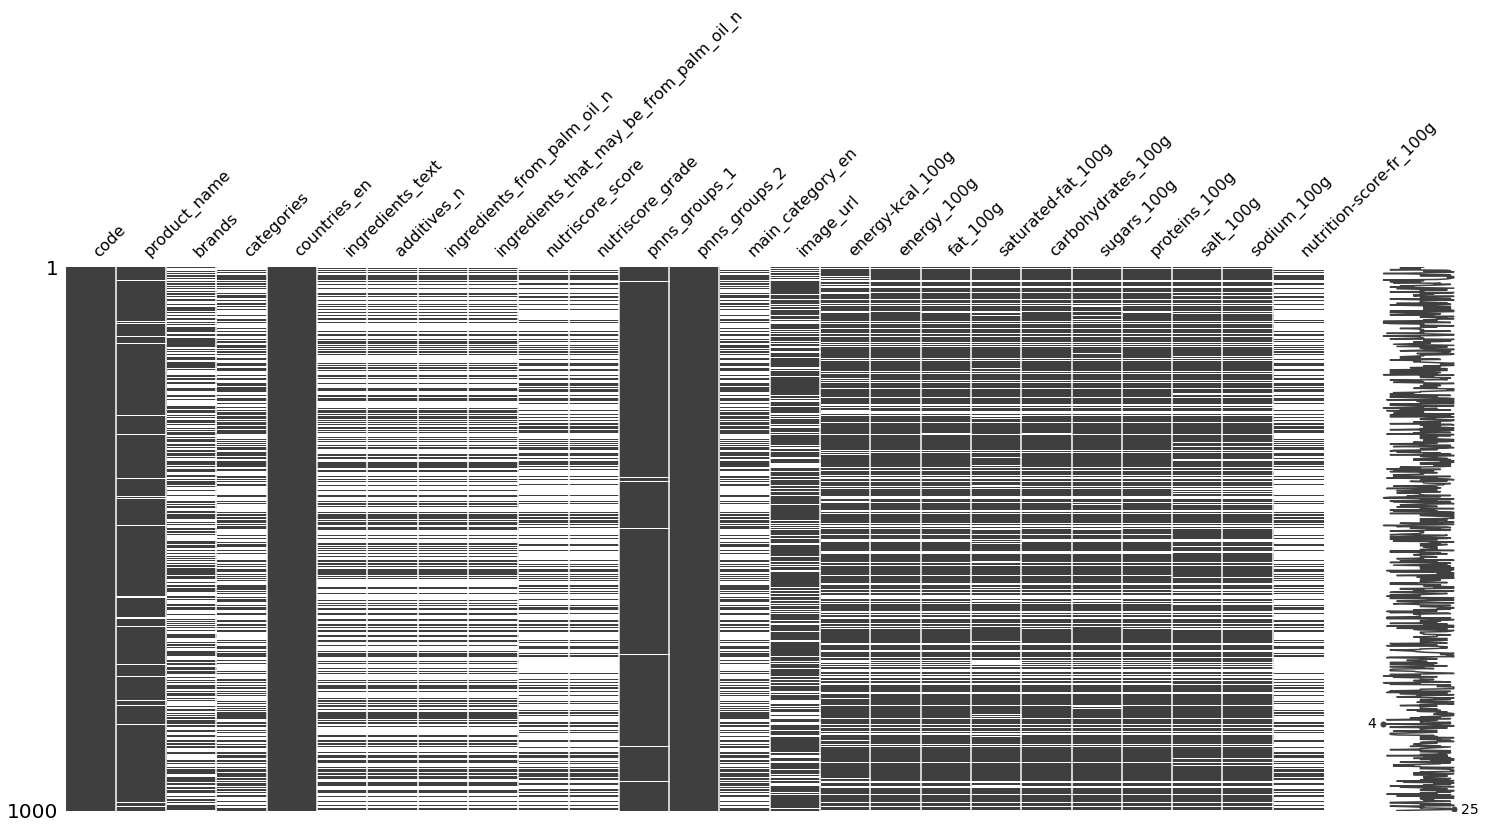

In [30]:
# visualize missing values pattern across columns in the form of matrix
msno.matrix(df_cleaned_cols.sample(1000))
plt.show()

**Remarque**<br>
Pour les colonnes qui ont les données manquantes, ils partagent le même modèle, notamment, de la colonne *energy-kcal_100g* à la colonne *sodium_100g*.

## Par Lignes

In [31]:
%%time
# Remove rows that have null values between 
# columns 'energy-kcal_100g' and 'sodium_100g'
slice1 = df_cleaned_cols.columns.get_loc("energy-kcal_100g")
slice2 = df_cleaned_cols.columns.get_loc("sodium_100g")
df_cleaned_rows1 = clean_rows(df_cleaned_cols, slice1=slice1, slice2=slice2)

Shape after removing null rows between energy-kcal_100g and 
sodium_100g:

(1464721, 25) 

CPU times: user 15min 24s, sys: 28.5 s, total: 15min 53s
Wall time: 15min 6s


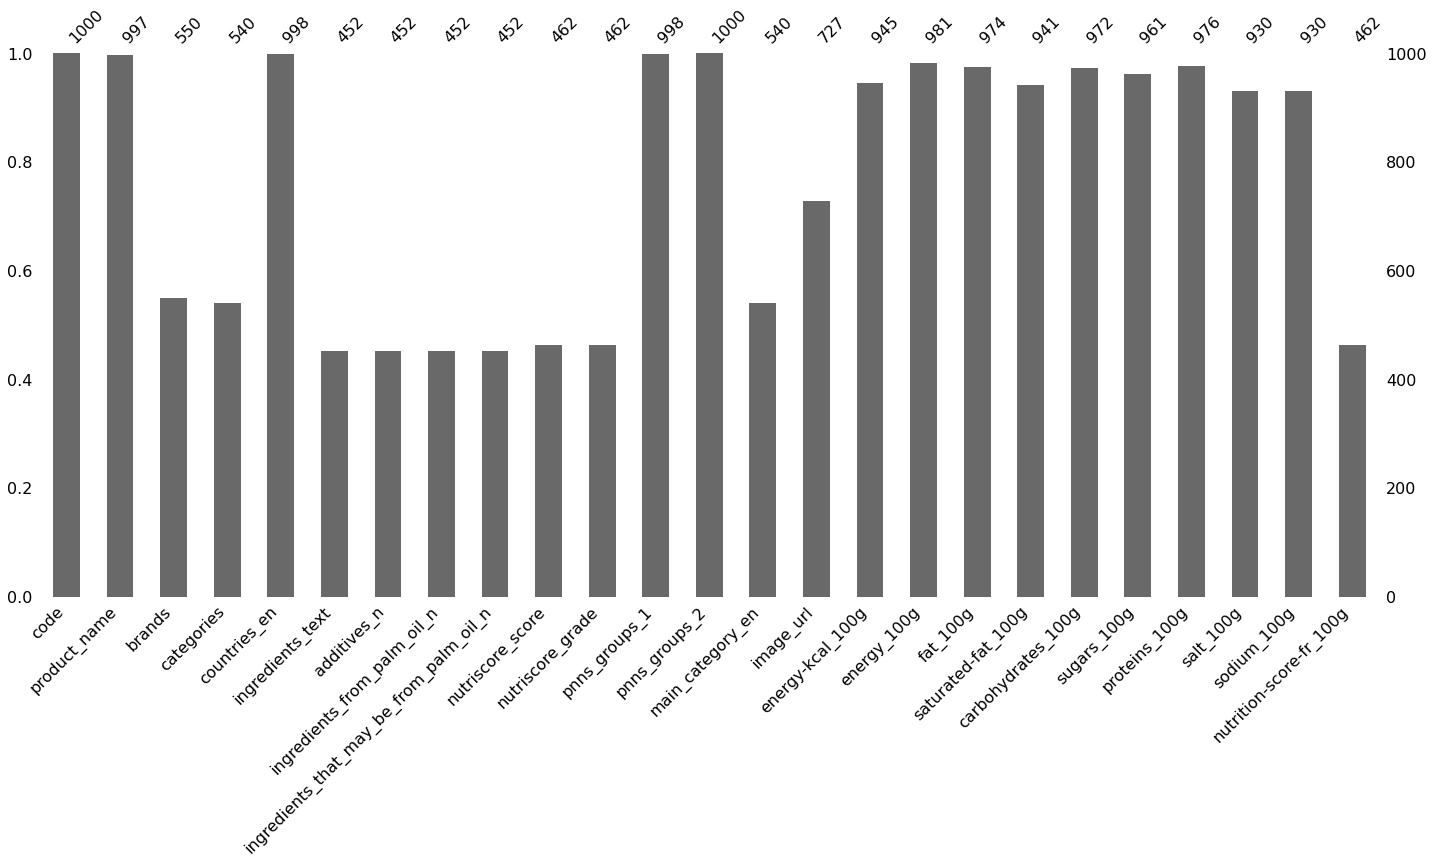

CPU times: user 1.72 s, sys: 1.33 s, total: 3.05 s
Wall time: 1.72 s


In [32]:
%%time
# visualize number of null values by column
msno.bar(df_cleaned_rows1.sample(1000))
plt.show()

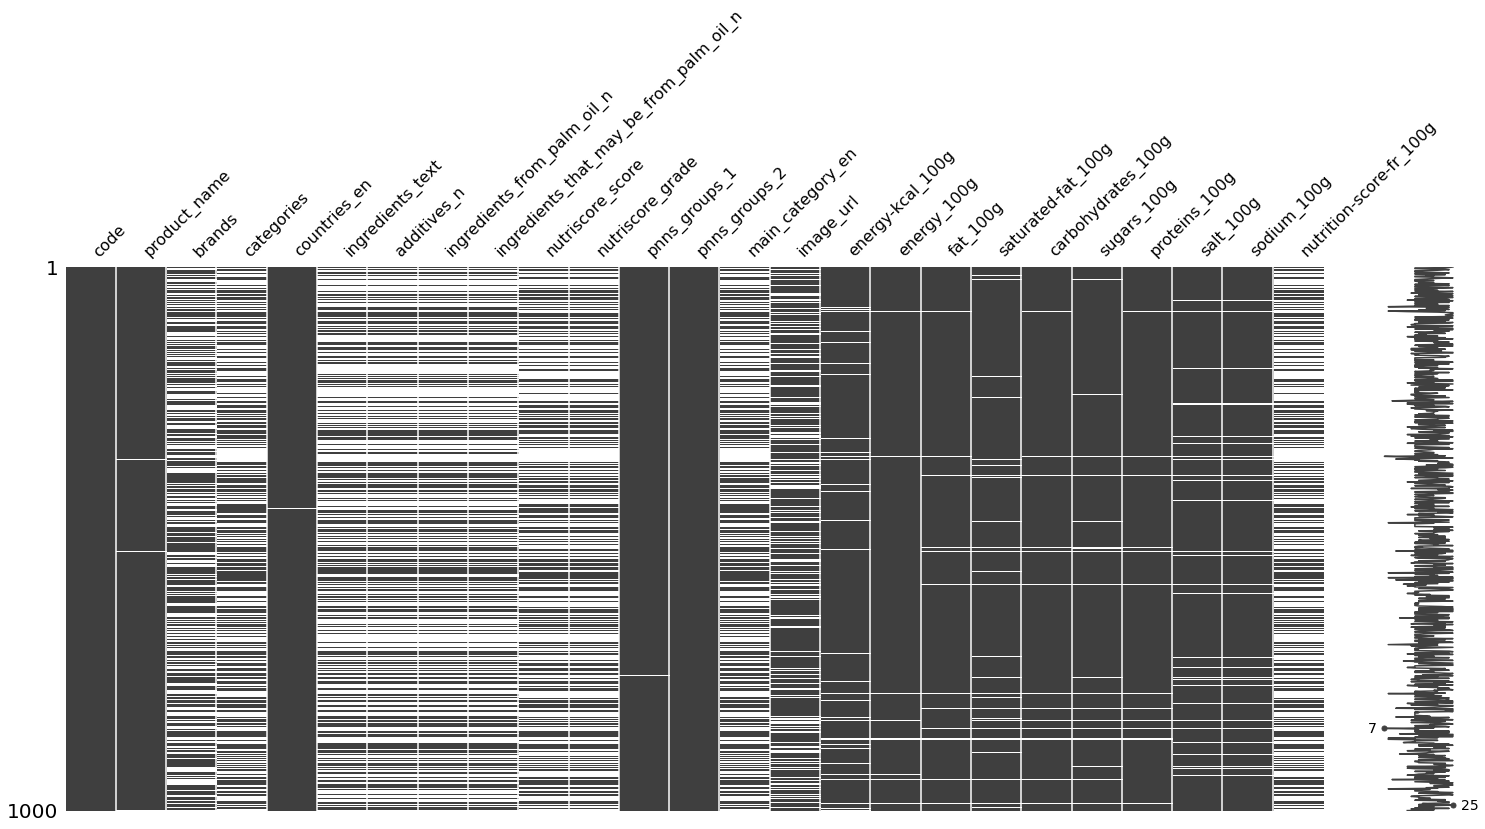

CPU times: user 597 ms, sys: 485 ms, total: 1.08 s
Wall time: 614 ms


In [33]:
%%time
# visualize missing values pattern across columns in the form of matrix
msno.matrix(df_cleaned_rows1.sample(1000))
plt.show()

In [34]:
%%time
df_cleaned_rows1.to_csv("data/products_clean_nutriscore_1.csv", index=False)

CPU times: user 52.1 s, sys: 4.59 s, total: 56.7 s
Wall time: 1min 48s


**Remarque**<br>
Les colonnes entre *energy-kcal_100g* et *proteins_100g* partagent encore un fois le même modèle.

In [35]:
%%time
# Remove rows that have null values between 
# columns 'energy-kcal_100g' and 'proteins_100g'
slice1 = df_cleaned_rows1.columns.get_loc("energy-kcal_100g")
slice2 = df_cleaned_rows1.columns.get_loc("proteins_100g")
df_cleaned_rows2 = clean_rows(df_cleaned_rows1, slice1=slice1, slice2=slice2)

Shape after removing null rows between energy-kcal_100g and 
proteins_100g:

(1447865, 25) 

CPU times: user 11min 59s, sys: 28.5 s, total: 12min 27s
Wall time: 11min 47s


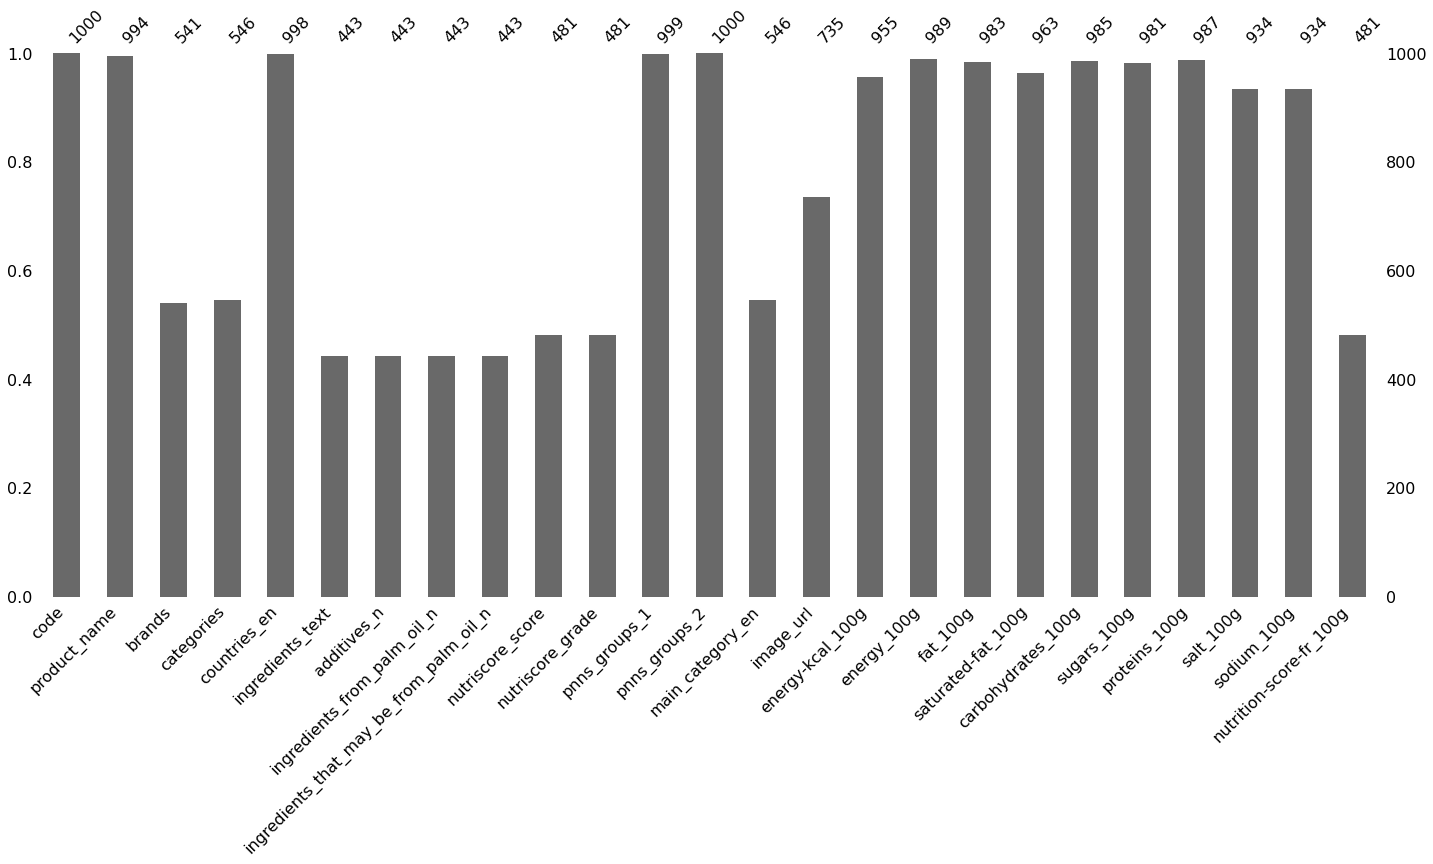

In [36]:
# visualize number of null values by column
msno.bar(df_cleaned_rows2.sample(1000))
plt.show()

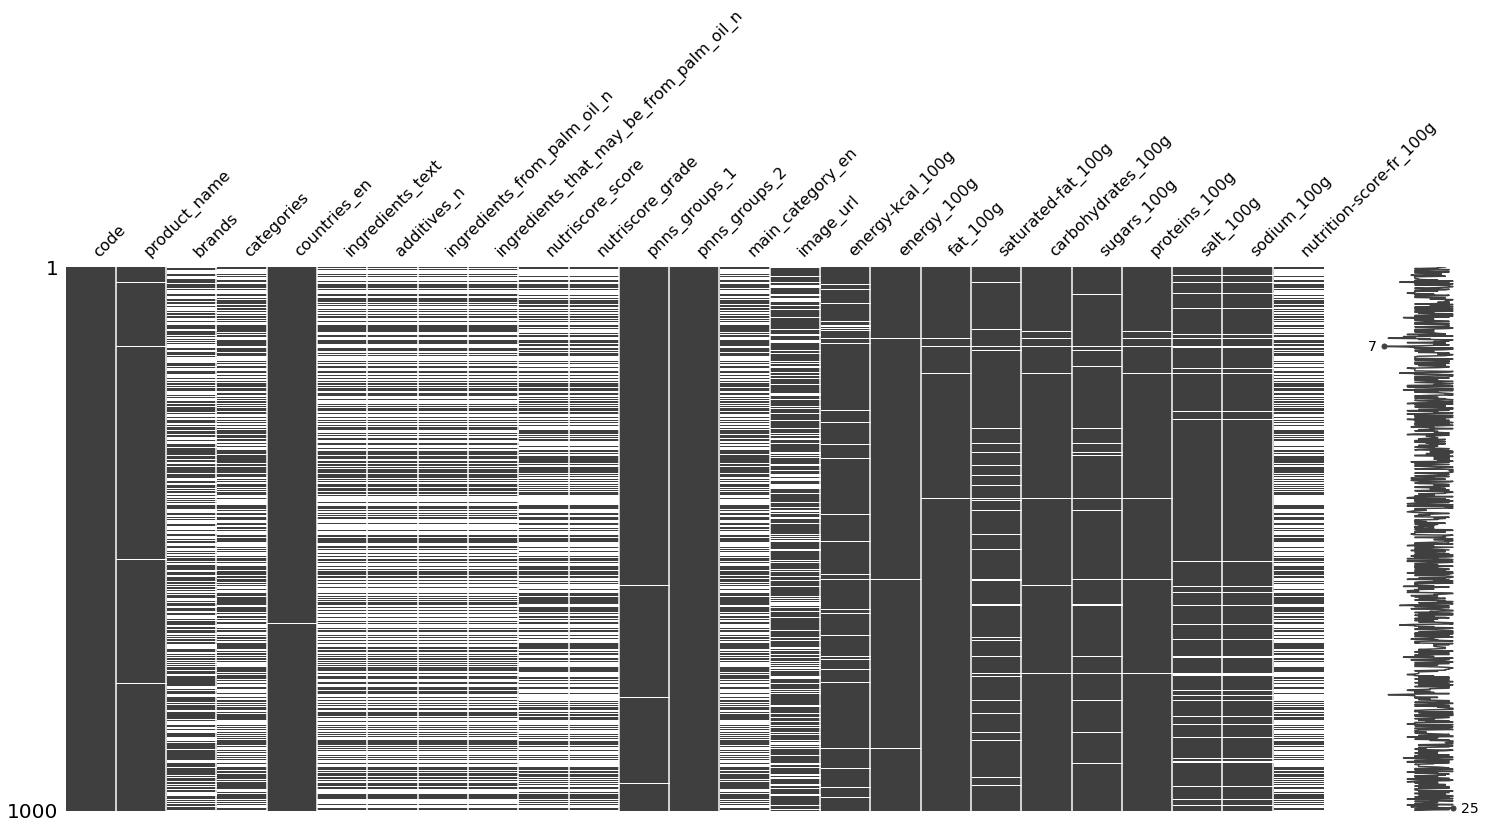

In [37]:
# visualize missing values pattern across columns in the form of matrix
msno.matrix(df_cleaned_rows2.sample(1000))
plt.show()

In [38]:
# Calculate by how much the df is reduced in terms of rows
print(f"{(1 - df_cleaned_rows2.shape[0]/df_cleaned_cols.shape[0])*100 :0.2f}%")

19.87%


In [39]:
%%time
df_cleaned_rows2.to_csv("data/products_clean_nutriscore_2.csv", index=False)

CPU times: user 43.4 s, sys: 3.63 s, total: 47 s
Wall time: 1min 27s


**Remarque**<br>
La taille de la dataframe est réduite encore par 20% en terme de ligne.

Les colonnes entre *fat_100g* et *sodium_100g* partagent encore un fois le même modèle.

In [40]:
%%time
# Remove rows that have null values between 
# columns 'fat_100g' and 'sodium_100g'
slice1 = df_cleaned_rows2.columns.get_loc("fat_100g")
slice2 = df_cleaned_rows2.columns.get_loc("sodium_100g")
df_cleaned_rows3 = clean_rows(df_cleaned_rows2, slice1=slice1, slice2=slice2)

Shape after removing null rows between fat_100g and 
sodium_100g:

(1443314, 25) 

CPU times: user 11min 34s, sys: 31.5 s, total: 12min 6s
Wall time: 11min 25s


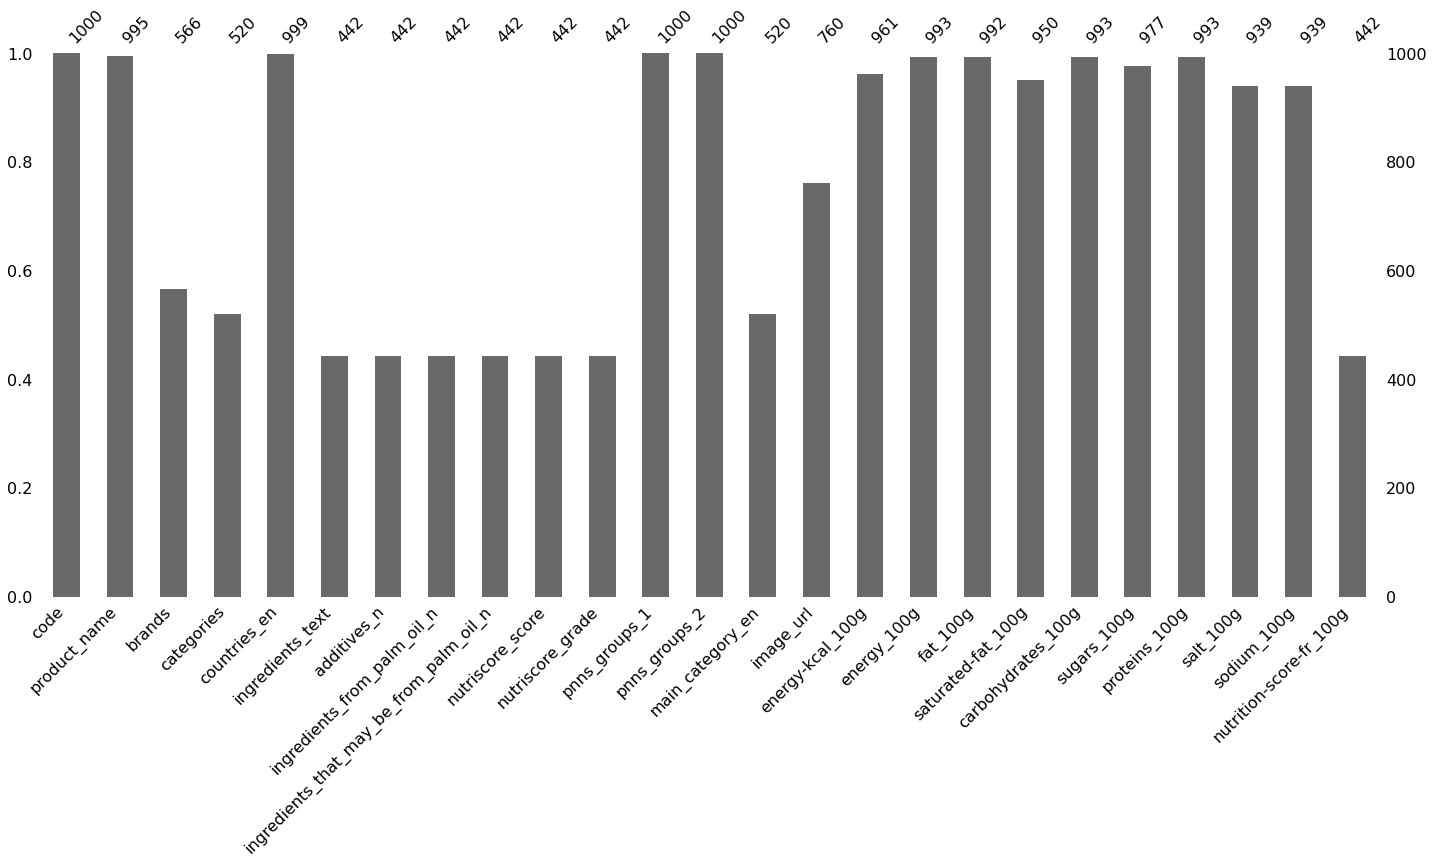

In [41]:
# visualize number of null values by column
msno.bar(df_cleaned_rows3.sample(1000))
plt.show()

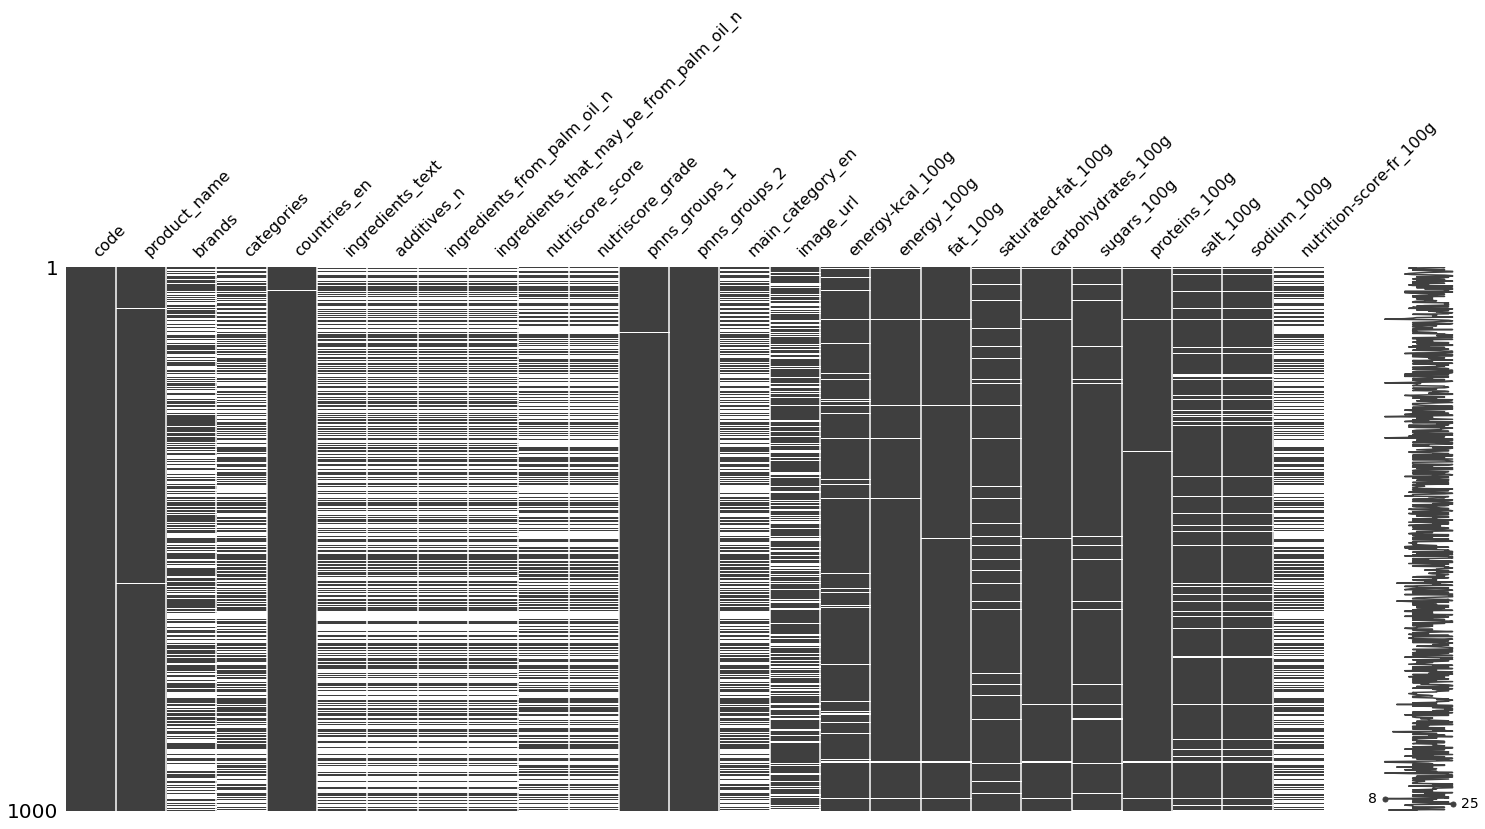

In [42]:
# visualize missing values pattern across columns in the form of matrix
msno.matrix(df_cleaned_rows3.sample(1000))
plt.show()

In [43]:
df = drop_duplicates(df_cleaned_rows3)

Shape after dropping duplicated rows:
(1443311, 25)



In [44]:
# Calculate by how much the df is reduced in terms of rows
print(f"{(1 - df.shape[0]/df_cleaned_cols.shape[0])*100 :0.2f}%")

20.12%


**Remarque**<br>
La taille de la dataframe est réduite encore par 20% en terme de ligne.

Les colonnes entre *fat_100g* et *sodium_100g* partagent encore un fois le même modèle.

In [45]:
%%time
df.to_csv("data/products_clean_nutriscore_3.csv", index=False)

CPU times: user 44.2 s, sys: 3.18 s, total: 47.4 s
Wall time: 1min 28s


# Exploration Preliminaire

## Colonnes 'pnns_groups_1' VS 'pnns_groups_2'

In [46]:
# df = pd.read_csv("data/products_clean_nutriscore_3.csv", low_memory=False)

In [48]:
# check how many "unknown" values in both 
# columns - "pnns_groups_1" and "pnns_groups_2"
print((df.pnns_groups_1 == 'unknown').sum())
print((df.pnns_groups_2 == 'unknown').sum())

816230
816230


In [49]:
# check if the both columns have the same pattern for the null values
set1 = set(df[df.pnns_groups_1.isnull()].index)
set2 = set(df[df.pnns_groups_2.isnull()].index)
set2-set1

set()

In [50]:
# check if the both columns have the same pattern for the unknown values
set1 = set(df[df.pnns_groups_1 == 'unknown'].index)
set2 = set(df[df.pnns_groups_2 == 'unknown'].index)
set2-set1

set()

In [51]:
# number of unique values for both columns
df.isnull().sum()[11:13]

pnns_groups_1    3226
pnns_groups_2       0
dtype: int64

In [52]:
# number of unique values for both columns
df.nunique()[11:13]

pnns_groups_1    14
pnns_groups_2    46
dtype: int64

**Remarque**<br>
1. Où la colonne "pnns_groups_2" ont les valeurs "unknown" ou manquantes sont identique que où la colonne "pnns_groups_1" les a. 
2. Il n'y a pas de valeur maquante dans la colonne "pnns_groups_2".
3. Il y a beaucoup plus de categories dans la colonne "pnns_groups_2" que la colonne "pnns_groups_1". On peut déduire que les catégories dans la colonne "pnns_groups_2" sont plus complètes que la colonne "pnns_groups_1".

<u>Conclusion</u>:<br>
Colonne à dropper : "pnns_groups_1"

## Colonnes "categories" VS "main_category_en"

In [53]:
# create a dataframe with only these 2 columns
df_cat = df[['categories','main_category_en']]

In [54]:
# number of null values in each column
df_cat.isnull().sum()

categories          679194
main_category_en    679194
dtype: int64

In [55]:
# check how many "unknown" values in both 
# columns - "categories" and "categories" 
print((df.categories == 'unknown').sum())
print((df.main_category_en == 'unknown').sum())

0
0


In [56]:
# number of unique values in each column
df_cat.nunique()

categories          83742
main_category_en    24276
dtype: int64

**Remarque**<br>
Les deux colonnes ont autant de valeurs manquantes et ne contiennent pas de valeur "unknown".

Par contre, comparé à la colonne "categories", la colonne "main_category_en" a 70% moins de valeurs uniques. Donc, il sera plus facile pour regrouper les categories de la colonne "main_category_en".<br>
Pour rappel, il n'y a pas de valeurs manquantes dans la colonne "pnns-groups-2". Et la colonne "pnns_groups_1" sera été droppée.

In [57]:
# an example where the values of'pnns_groups_2' can be 
# replaced by the that of 'main_category_en'
df[["categories", "main_category_en", "pnns_groups_2"]][114:116]

,categories,main_category_en,pnns_groups_2
114,Compléments alimentaires,Dietary supplements,unknown
115,NaN,NaN,unknown


In [58]:
# generate a list of index where there are values in the column
# "main_category_en" but values are "unknown" in the column "pnns_groups_2"
set_cat = set(df[df.main_category_en.isnull()].index)
fill_unknown = sorted(set2 - set_cat)

In [59]:
num_unknown_pnns_2 = (df.pnns_groups_2 == 'unknown').sum()
num_unknown_can_be_filled = len(fill_unknown)
print(f"Number of unknown values in 'pnns_groups_2': {num_unknown_pnns_2:>17}")
print( "Number of unknown values in 'pnns_groups_2'\n"
      f"can be filled by 'main_category_en': {num_unknown_can_be_filled:>25}")
print(f"Number of unknown values left in 'pnns_groups_2' after: {num_unknown_pnns_2 - num_unknown_can_be_filled}")

Number of unknown values in 'pnns_groups_2':            816230
Number of unknown values in 'pnns_groups_2'
can be filled by 'main_category_en':                    137036
Number of unknown values left in 'pnns_groups_2' after: 679194


**Remarque**<br>
Si on remplace les valeurs "unknown" de 'pnns_groups_2' avec les valueurs valides de 'main_category_en' :
1. On va avoir 137 036 moins de valeurs "unknown". Mais il faut regrouper toutes ces valeurs, qui ont 24 276 de valeurs uniques, avec les 46 catégroies de la colonnes 'pnns_groups_2'.
2. Il nous reste encore 679 194 valueurs "unknown".

De ce fait, les valeurs "unknown" de 'pnns_groups_2' ne seront pas été remplacées. Et on garde la colonne 'pnns_groups_2' ainsi.

In [60]:
# drop columns "categories", "main_category_en" and "pnns_groups_1"
df.drop(columns=["categories", "main_category_en", "pnns_groups_1"], inplace=True)

In [61]:
%%time
df.to_csv("data/products_clean_nutriscore_4.csv", index=False)

CPU times: user 39.5 s, sys: 2.26 s, total: 41.8 s
Wall time: 1min 18s


# QUESTION
une doutes sur le barcode

# Annexe

## Nettoyage de Données

### Par Colonnes

#### Default Filled Rate (60%)

In [62]:
%%time
df_cleaned_cols = clean_columns(df_raw)

Initial shape of the dataframe:    (1806889, 186)
Shape after removing null columns: (1806889, 27)
CPU times: user 1min 13s, sys: 48.1 s, total: 2min 1s
Wall time: 2min


In [63]:
# Calculate by how much the df is reduced in terms of columns
print(f"{(1 - df_cleaned_cols.shape[1]/df_raw.shape[1])*100 :0.2f}%")

85.48%


La taille de la dataframe est réduite par 85% en terme de colonne.

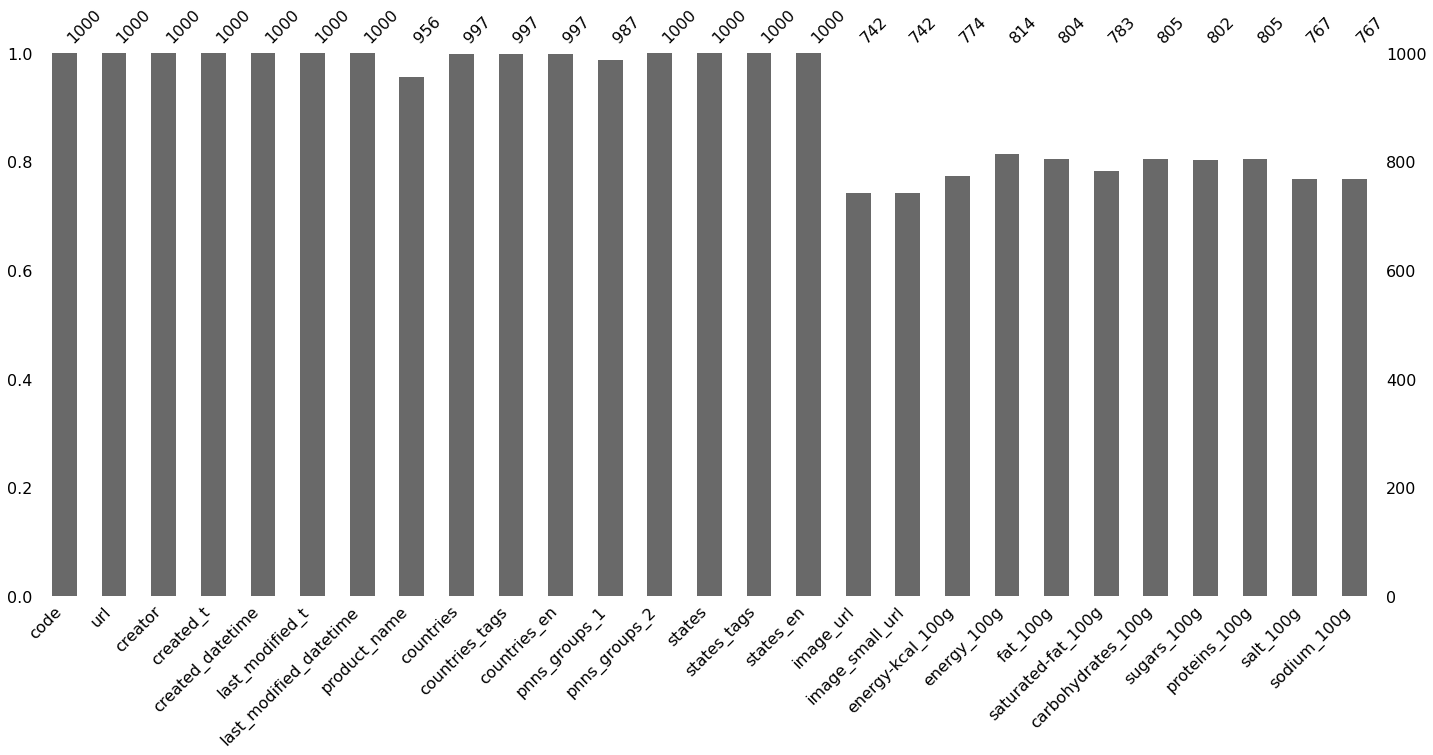

In [64]:
# visualize number of null values by column
# msno.bar(df)
msno.bar(df_cleaned_cols.sample(1000))
plt.show()

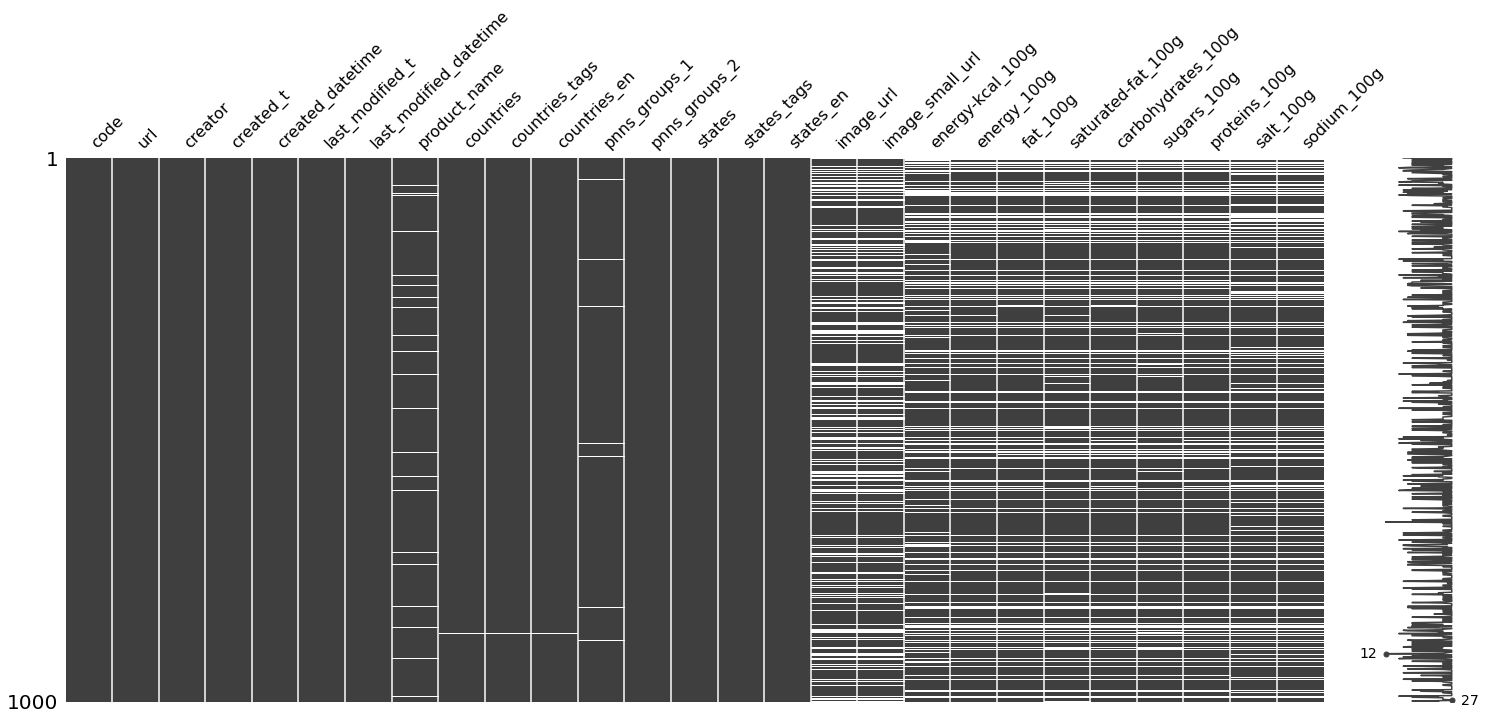

In [65]:
# visualize missing values pattern across columns in the form of matrix
msno.matrix(df_cleaned_cols.sample(1000))
plt.show()

**Remarque**<br>
On constate qu'il y a beaucoup moins de données manquantes. 

De plus, pour les colonnes qui ont les données manquantes, ils partagent le même modèle, notamment, de *energy-kcal_100g* à *proteins_100g*.

#### Colonnes de 'packaging'

In [66]:
print(list(df_raw.packaging.unique())[:10])
print(list(df_raw.packaging_tags.unique())[:10])
print(list(df_raw.packaging_text.unique())[:10])

[nan, 'barquette,plastique', 'verre', 'fr:Boîte en métal', 'bocal,plastique', 'plastique', 'carton,plastique', 'plastique,carton', 'Frais', 'Sachet']
[nan, 'barquette,plastique', 'verre', 'fr-boite-en-metal', 'bocal,plastique', 'plastique', 'carton,plastique', 'plastique,carton', 'frais', 'sachet']
[nan, '1 pot en verre à recycler', '1 Pot en verre à recycler', 'Bouteille en verre à recycler', '1 emballage carton à recycler, emballages plastiques à jeter', 'Non recycled', 'Bag: Paper - widely recycled.', '1 boîte carton à recycler, 1 bouteille verre à recycler, 1 bouchon plastique à jeter', '70 GL  21 PAP', '70 GL   21 PAP']


In [67]:
df_raw.packaging.isnull().sum()/df_raw.__len__()

0.8403748099634233

In [68]:
df_cleaned_cols.insert(2, 'packaging', df_raw.packaging)

#### Missing Values Heatmap with the Cleaned Dataframe

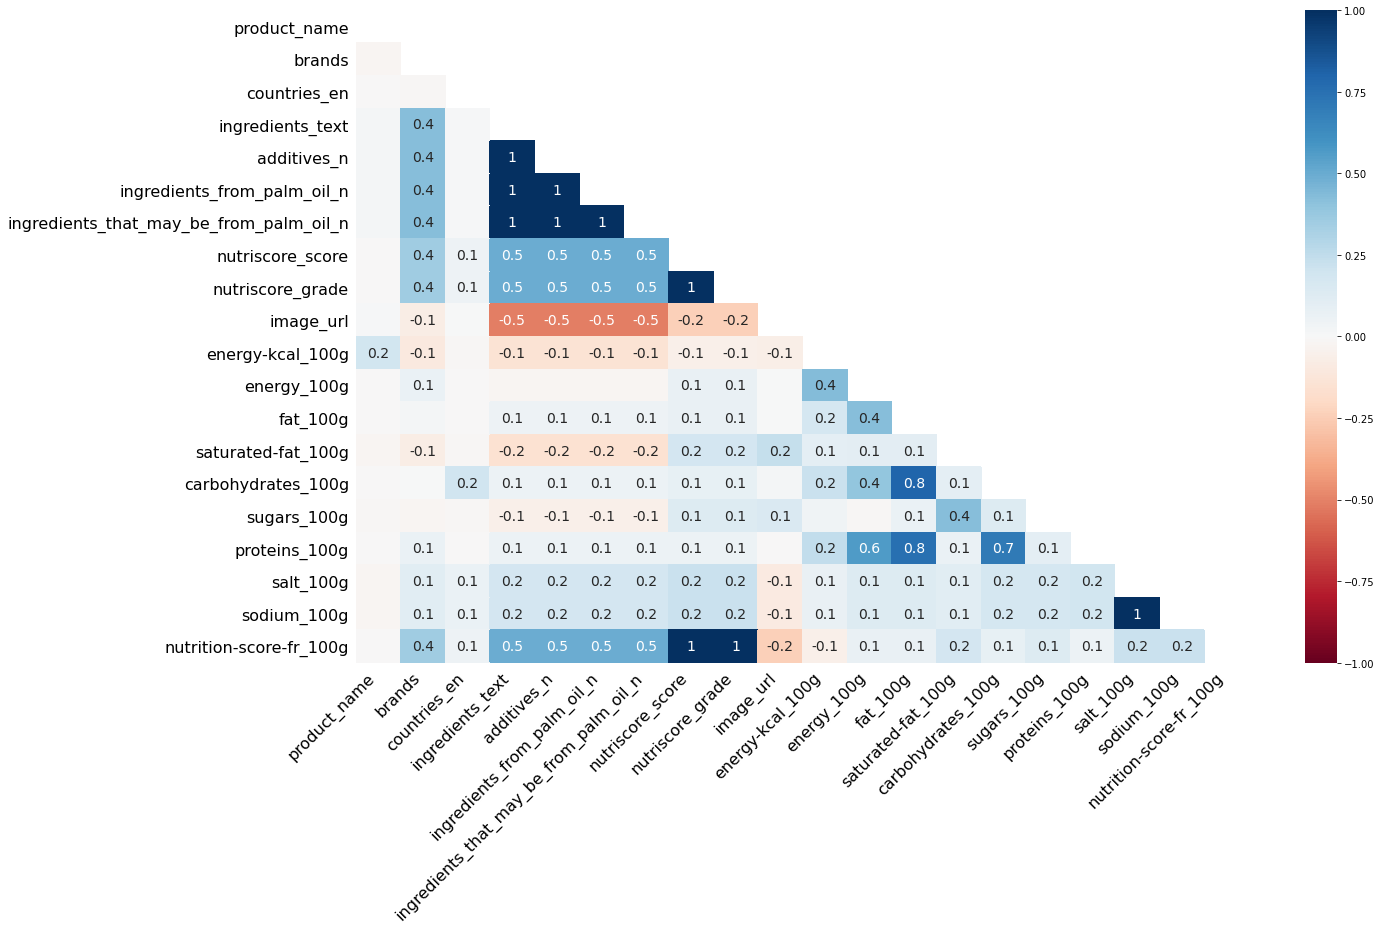

In [69]:
# visualize correlation between missing values for the "cleaned" df
msno.heatmap(df.sample(1000))
plt.show()